<div style="float: right;">
  <a href="../de/data_processing.html" style="margin-left: 10px;">🇩🇪 Deutsch</a>
  <a href="../en/data_processing.html">🇬🇧 English</a>
</div>

# 5. Descriptive data analysis

## What do we use Python for?
In ‘DaLi topic 1: Basics of data evaluation’, the most important forms of visualisation and key figures required for 
data evaluation were presented.

As soon as we are dealing with the processing of real data sets (usually very extensive), software can help 
us to create certain key figures and forms of visualisation. This DaLi topic is therefore about analysing and 
visualising these data sets using software (Python or R).

To get a first impression of how we can use Python in this context, we use the ‘Tips’ dataset from ‘DaLi Topic 1: 
Fundamentals of data analysis’ that we are already familiar with.

## Brief description of the data set Tips
A waiter recorded information on every tip he received in a restaurant over a period of several months. Several 
variables were recorded:
- Bill amount in dollars (total_bill)
- Tip in dollars (tip)
- Gender of the bill payer (sex)
- Smokers among the guests (smoker)
- Day of the week (day)
- Time of day (time)
- Size of the group (size)

In the following, we will first briefly explain what the following code does and then you will find the code and 
the corresponding output.

## Get initial information about a data set
The following two functions are built into Python via the pandas library. They are useful for gaining an initial 
overview of a dataset and the characteristics of its features.
- *info()* provides details about the data structure, such as column names, data types, and the number of non-missing 
values.
- *describe(include='all')* returns summary statistics for each column — including minimum, maximum, mean, quartiles, 
and more. It also includes categorical variables if include='all' is specified.

These functions are ideal for quickly identifying potential issues (e.g. missing values or incorrect data types) and 
getting a basic sense of the data distribution.

In [1]:
import pandas as pd
tips = pd.read_csv("tips.csv")

tips.info()
tips.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


You can obtain similar information by using the *skim()* function from the *skimpy* library.

In [2]:
from skimpy import skim
import pandas as pd
tips = pd.read_csv("tips.csv")

skim(tips)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 244    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ total_bill     │   0 │      0 │   19.79 │    8.902 │   3.07 │   13.35 │   17.8 │  24.13 │  50.81 │ ▂█▄▂▁▁  │  │
│ │ tip            │   0 │      0 │   2.998 │    1.384 │      1 │       2 │    2.9 │  3.562 │     10 │  ██▃▁   │  │
│ │ size           │   0 │      0 │    2.57 │   0.9511 │      1 │       2 │      2 │      3 │      6 │   █▂▂   │  │
│ └────────────────┴─────┴────────┴─────────┴──────────┴────────┴─────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column  ┃ NA  ┃ NA %  ┃ shortest  ┃ longest ┃ min    ┃ max   ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ sex     │   0 │     0 │ Male      │ Female  │ Female │ Male  │          4.71 │             1 │         244 │  │
│ │ smoker  │   0 │     0 │ No        │ Yes     │ No     │ Yes   │          2.38 │             1 │         244 │  │
│ │ day     │   0 │     0 │ Sun       │ Thur    │ Fri    │ Thur  │          3.25 │             1 │         244 │  │
│ │ time    │   0 │     0 │ Lunch     │ Dinner  │ Dinner │ Lunch │          5.72 │             1 │         244 │  │
│ └─────────┴─────┴───────┴───────────┴─────────┴────────┴───────┴───────────────┴───────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Exercise 1
```{raw} html
<style>
  :root {
    --accent: #4f46e5;
    --accent-light: #eef2ff;
    --bg: #ffffff;
    --border: #e5e7eb;
    --text: #111827;
    --gray: #6b7280;
    --success: #16a34a;
    --error: #dc2626;
    --warning: #facc15;
  }

  /* Quiz 1 Container */
  #quiz1-container {
    background: var(--bg);
    border: 1px solid var(--border);
    border-radius: 16px;
    padding: 2rem;
    max-width: 750px;
    font-family: "Segoe UI", Roboto, sans-serif;
    color: var(--text);
    box-shadow: 0 8px 24px rgba(0, 0, 0, 0.05);
    transition: box-shadow 0.3s ease;
    margin-bottom: 2rem;
  }
  #quiz1-container:hover {
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.08);
  }

  #quiz1-container p.question {
    font-size: 1.25rem;
    font-weight: 600;
    margin-bottom: 1.5rem;
  }

  /* Flex labels for Quiz 1 */
  #quiz1-form label {
    display: flex;
    align-items: center;
    gap: 0.75rem;
    margin: 0.75rem 0;
    padding: 0.75rem 1rem;
    border-radius: 12px;
    border: 1px solid transparent;
    background-color: var(--accent-light);
    cursor: pointer;
    transition: all 0.25s ease;
  }
  #quiz1-form label:hover {
    background-color: #e0e7ff;
    border-color: var(--accent);
  }

  #quiz1-form input[type="radio"] {
    transform: scale(1.2);
    accent-color: var(--accent);
  }

  #quiz1-form pre {
    margin: 0;
    background-color: transparent !important;
    border: none !important;
    display: inline;
    font-size: 0.95rem;
    white-space: pre-wrap;
    padding: 0;
    font-family: 'Courier New', Courier, monospace;
  }

  #quiz1-form button {
    margin-top: 1.5rem;
    background-color: var(--accent);
    color: white;
    padding: 0.6rem 1.2rem;
    border: none;
    border-radius: 8px;
    font-size: 1rem;
    font-weight: 600;
    cursor: pointer;
    transition: background-color 0.3s ease;
  }
  #quiz1-form button:hover {
    background-color: #4338ca;
  }

  #quiz1-feedback {
    margin-top: 1.25rem;
    padding: 0.75rem 1rem;
    border-radius: 8px;
    font-weight: 500;
    font-size: 1rem;
    display: inline-block;
  }
  .success {
    background-color: #dcfce7;
    color: var(--success);
    border: 1px solid var(--success);
  }
  .error {
    background-color: #fee2e2;
    color: var(--error);
    border: 1px solid var(--error);
  }
  .warning {
    background-color: #fef9c3;
    color: var(--warning);
    border: 1px solid var(--warning);
  }
</style>

<div id="quiz1-container">
  <p class="question">🧠 What was the maximum tip amount, in dollars, that the waiter received and recorded?</p>
  <form id="quiz1-form">
    <label>
      <input type="radio" name="answer1" value="a">
      <pre><code>$6</code></pre>
    </label>
    <label>
      <input type="radio" name="answer1" value="b">
      <pre><code>$10</code></pre>
    </label>
    <label>
      <input type="radio" name="answer1" value="c">
      <pre><code>$12</code></pre>
    </label>
    <label>
      <input type="radio" name="answer1" value="d">
      <pre><code>$20</code></pre>
    </label>

    <button type="button" onclick="checkAnswer1()">Submit Answer</button>
    <p id="quiz1-feedback"></p>
  </form>
</div>

<script>
  function checkAnswer1() {
    const answers1 = {
      a: { correct: false, feedback: "❌ The maximum recorded tip was higher than $6." },
      b: { correct: true,  feedback: "✅ Correct! The highest tip documented was $10." },
      c: { correct: false, feedback: "❌ Not quite. It wasn't $12." },
      d: { correct: false, feedback: "❌ No, the maximum tip recorded was not $20." }
    };

    const selected = document.querySelector('input[name="answer1"]:checked');
    const feedback = document.getElementById("quiz1-feedback");

    if (!selected) {
      feedback.textContent = "⚠️ Please select an answer before submitting.";
      feedback.className = "warning";
      return;
    }

    const result = answers1[selected.value];
    feedback.textContent = result.feedback;
    feedback.className = result.correct ? "success" : "error";
  }
</script>
```

## Create bar chart
Below you can see a variant for creating a bar chart. The *bar()* function from the *matplotlib* library is used to 
display the frequencies of the categories 'Female' and 'Male' in the 'sex' column of the dataset.

First, the *Pandas* library is used to load the dataset *tips.csv*. Then, the *value_counts()* function is applied to 
the'sex' column to count how often each gender appears. These counts are stored in the variable 'sex_counts', and the 
corresponding category labels and values are extracted.

Finally, a simple vertical bar chart is created with *plt.bar()*. The chart includes a title and axis labels to make the 
information easier to interpret.

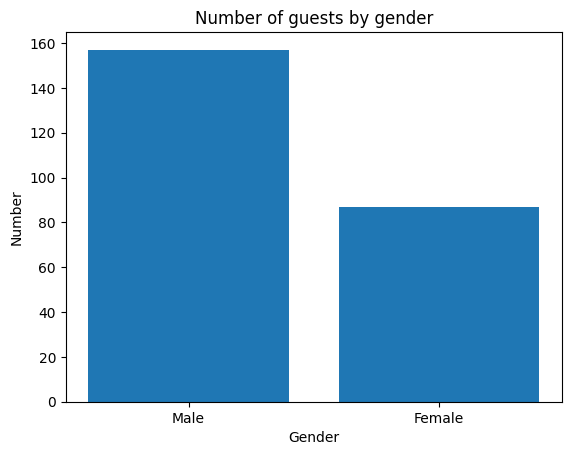

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

sex_counts = tips["sex"].value_counts()
labels = sex_counts.index
values = sex_counts.values

plt.bar(labels, values)

plt.title("Number of guests by gender")
plt.xlabel("Gender")
plt.ylabel("Number")
plt.show()

## Split bar chart
The following code creates a grouped bar chart that shows the number of guests by gender, separated by time of day 
(Lunch vs. Dinner). This is achieved using Seaborn’s *catplot()* function, which allows for the creation of multiple 
subplots based on the values of a categorical feature.

The argument *col="time"* specifies that a separate chart should be created for each value in the time column. The 
result is two side-by-side bar charts showing the distribution of genders for lunch and dinner, respectively.

This visualization is helpful to compare how the gender distribution of guests differs between the two meal times.

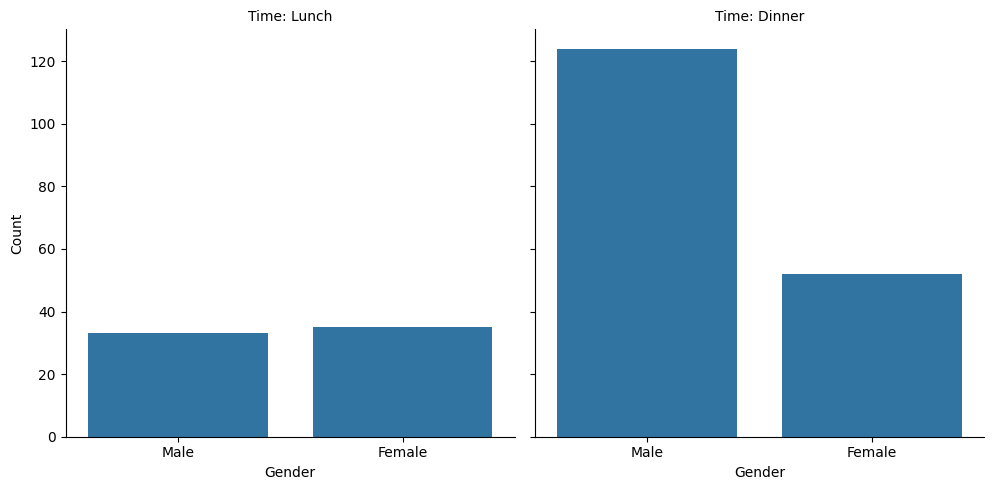

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tips = pd.read_csv("tips.csv")
tips = sns.load_dataset("tips")

g = sns.catplot(
    data=tips,
    x="sex",
    kind="count",
    col="time",
)

g.set_titles("Time: {col_name}")
g.set_axis_labels("Gender", "Count")
plt.show()

### Exercise 2
```{raw} html
<style>
  :root {
    --accent: #4f46e5;
    --accent-light: #eef2ff;
    --bg: #ffffff;
    --border: #e5e7eb;
    --text: #111827;
    --gray: #6b7280;
    --success: #16a34a;
    --error: #dc2626;
    --warning: #facc15;
  }

  /* Quiz 2 Container */
  #quiz2-container {
    background: var(--bg);
    border: 1px solid var(--border);
    border-radius: 16px;
    padding: 2rem;
    max-width: 750px;
    font-family: "Segoe UI", Roboto, sans-serif;
    color: var(--text);
    box-shadow: 0 8px 24px rgba(0, 0, 0, 0.05);
    transition: box-shadow 0.3s ease;
    margin-bottom: 2rem;
  }
  #quiz2-container:hover {
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.08);
  }

  #quiz2-container p.question {
    font-size: 1.25rem;
    font-weight: 600;
    margin-bottom: 1.5rem;
  }

  /* Flex labels for Quiz 2 */
  #quiz2-form label {
    display: flex;
    align-items: center;
    gap: 0.75rem;
    margin: 0.75rem 0;
    padding: 0.75rem 1rem;
    border-radius: 12px;
    border: 1px solid transparent;
    background-color: var(--accent-light);
    cursor: pointer;
    transition: all 0.25s ease;
  }
  #quiz2-form label:hover {
    background-color: #e0e7ff;
    border-color: var(--accent);
  }

  #quiz2-form input[type="radio"] {
    transform: scale(1.2);
    accent-color: var(--accent);
  }

  #quiz2-form pre {
    margin: 0;
    background-color: transparent !important;
    border: none !important;
    display: inline;
    font-size: 0.95rem;
    white-space: pre-wrap;
    padding: 0;
    font-family: 'Courier New', Courier, monospace;
  }

  #quiz2-form button {
    margin-top: 1.5rem;
    background-color: var(--accent);
    color: white;
    padding: 0.6rem 1.2rem;
    border: none;
    border-radius: 8px;
    font-size: 1rem;
    font-weight: 600;
    cursor: pointer;
    transition: background-color 0.3s ease;
  }
  #quiz2-form button:hover {
    background-color: #4338ca;
  }

  #quiz2-feedback {
    margin-top: 1.25rem;
    padding: 0.75rem 1rem;
    border-radius: 8px;
    font-weight: 500;
    font-size: 1rem;
    display: inline-block;
  }

  .success {
    background-color: #dcfce7;
    color: var(--success);
    border: 1px solid var(--success);
  }
  .error {
    background-color: #fee2e2;
    color: var(--error);
    border: 1px solid var(--error);
  }
  .warning {
    background-color: #fef9c3;
    color: var(--warning);
    border: 1px solid var(--warning);
  }
</style>

<div id="quiz2-container">
  <p class="question">🧠 During lunch the number of female and male guests who paid was roughly equal, but at dinner male guests paid for the meal significantly more often (more than twice as many). True or false?</p>
  <form id="quiz2-form">
    <label>
      <input type="radio" name="answer2" value="a">
      <pre><code>True</code></pre>
    </label>
    <label>
      <input type="radio" name="answer2" value="b">
      <pre><code>False</code></pre>
    </label>
    <label>
      <input type="radio" name="answer2" value="c">
      <pre><code>Cannot determine from data</code></pre>
    </label>

    <button type="button" onclick="checkAnswer2()">Submit Answer</button>
    <p id="quiz2-feedback"></p>
  </form>
</div>

<script>
  function checkAnswer2() {
    const answers2 = {
      a: { correct: true,  feedback: "✅ Correct! Significantly more male guests paid at dinner (over twice as many)." },
      b: { correct: false, feedback: "❌ Incorrect. The data do support the statement." },
      c: { correct: false, feedback: "❌ You can determine from the data that male guests paid more than twice as often at dinner." }
    };

    const selected = document.querySelector('input[name="answer2"]:checked');
    const feedback = document.getElementById("quiz2-feedback");

    if (!selected) {
      feedback.textContent = "⚠️ Please select an answer before submitting.";
      feedback.className = "warning";
      return;
    }

    const result = answers2[selected.value];
    feedback.textContent = result.feedback;
    feedback.className = result.correct ? "success" : "error";
  }
</script>
```

## Create histogram
The following code creates a histogram that visualizes the frequency distribution of invoice amounts in the dataset. 
The function plt.hist() from the Matplotlib library is used to display how often invoice amounts within specific value 
ranges occur. 

*edgecolor="black"* adds clear borders to each bar.

The x-axis represents the invoice amounts in dollars, while the y-axis shows the number of invoices that fall into 
each interval.

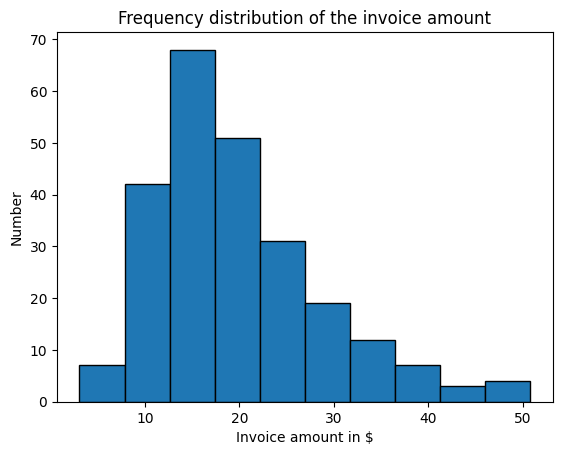

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

plt.hist(
    tips["total_bill"],
    edgecolor="black"
)
plt.title("Frequency distribution of the invoice amount")
plt.xlabel("Invoice amount in $")
plt.ylabel("Number")
plt.show()

## Create scatter plot
The following code creates a scatter plot to visualize the relationship between the total bill and the tip amount. 
The *plt.scatter()* function from the Matplotlib library is used to plot each observation as a point, where:
- the x-axis represents the total bill in dollars
- the y-axis represents the corresponding tip amount

Each point in the diagram corresponds to one row in the dataset. This type of visualization is useful for identifying 
patterns or trends — for example, whether higher bills are associated with higher tips.

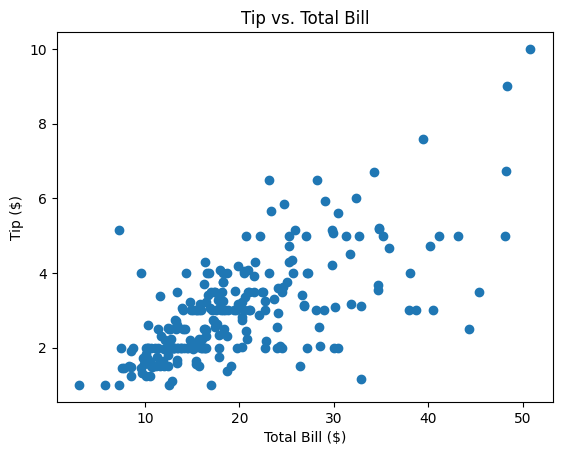

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

plt.scatter(
    tips["total_bill"],
    tips["tip"]
)

plt.title("Tip vs. Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

### Exercise 3
```{raw} html
<style>
  :root {
    --accent: #4f46e5;
    --accent-light: #eef2ff;
    --bg: #ffffff;
    --border: #e5e7eb;
    --text: #111827;
    --gray: #6b7280;
    --success: #16a34a;
    --error: #dc2626;
    --warning: #facc15;
  }

  /* Quiz 3 Container */
  #quiz3-container {
    background: var(--bg);
    border: 1px solid var(--border);
    border-radius: 16px;
    padding: 2rem;
    max-width: 750px;
    font-family: "Segoe UI", Roboto, sans-serif;
    color: var(--text);
    box-shadow: 0 8px 24px rgba(0, 0, 0, 0.05);
    transition: box-shadow 0.3s ease;
    margin-bottom: 2rem;
  }
  #quiz3-container:hover {
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.08);
  }

  #quiz3-container p.question {
    font-size: 1.25rem;
    font-weight: 600;
    margin-bottom: 1.5rem;
  }

  /* Flex labels for Quiz 3 */
  #quiz3-form label {
    display: flex;
    align-items: center;
    gap: 0.75rem;
    margin: 0.75rem 0;
    padding: 0.75rem 1rem;
    border-radius: 12px;
    border: 1px solid transparent;
    background-color: var(--accent-light);
    cursor: pointer;
    transition: all 0.25s ease;
  }
  #quiz3-form label:hover {
    background-color: #e0e7ff;
    border-color: var(--accent);
  }

  #quiz3-form input[type="radio"] {
    transform: scale(1.2);
    accent-color: var(--accent);
  }

  #quiz3-form pre {
    margin: 0;
    background-color: transparent !important;
    border: none !important;
    display: inline;
    font-size: 0.95rem;
    white-space: pre-wrap;
    padding: 0;
    font-family: 'Courier New', Courier, monospace;
  }

  #quiz3-form button {
    margin-top: 1.5rem;
    background-color: var(--accent);
    color: white;
    padding: 0.6rem 1.2rem;
    border: none;
    border-radius: 8px;
    font-size: 1rem;
    font-weight: 600;
    cursor: pointer;
    transition: background-color 0.3s ease;
  }
  #quiz3-form button:hover {
    background-color: #4338ca;
  }

  #quiz3-feedback {
    margin-top: 1.25rem;
    padding: 0.75rem 1rem;
    border-radius: 8px;
    font-weight: 500;
    font-size: 1rem;
    display: inline-block;
  }

  .success {
    background-color: #dcfce7;
    color: var(--success);
    border: 1px solid var(--success);
  }
  .error {
    background-color: #fee2e2;
    color: var(--error);
    border: 1px solid var(--error);
  }
  .warning {
    background-color: #fef9c3;
    color: var(--warning);
    border: 1px solid var(--warning);
  }
</style>

<div id="quiz3-container">
  <p class="question">🧠 What was the tip amount for a bill of approximately $48? (Approximate reading is sufficient)</p>
  <form id="quiz3-form">
    <label>
      <input type="radio" name="answer3" value="a">
      <pre><code>$11</code></pre>
    </label>
    <label>
      <input type="radio" name="answer3" value="b">
      <pre><code>$3, $5, and $8</code></pre>
    </label>
    <label>
      <input type="radio" name="answer3" value="c">
      <pre><code>$5, $7, and $9</code></pre>
    </label>
    <label>
      <input type="radio" name="answer3" value="d">
      <pre><code>None of the above</code></pre>
    </label>

    <button type="button" onclick="checkAnswer3()">Submit Answer</button>
    <p id="quiz3-feedback"></p>
  </form>
</div>

<script>
  function checkAnswer3() {
    const answers3 = {
      a: { correct: false, feedback: "❌ Not correct. The tip values at $48 were lower." },
      b: { correct: false, feedback: "❌ Incorrect. You can see $3, $5, and $8 are not the only ones." },
      c: { correct: true,  feedback: "✅ Correct! The tips were approximately $5, $7, and $9." },
      d: { correct: false, feedback: "❌ There is a valid answer: it was $5, $7, and $9." }
    };

    const selected = document.querySelector('input[name="answer3"]:checked');
    const feedback = document.getElementById("quiz3-feedback");

    if (!selected) {
      feedback.textContent = "⚠️ Please select an answer before submitting.";
      feedback.className = "warning";
      return;
    }

    const result = answers3[selected.value];
    feedback.textContent = result.feedback;
    feedback.className = result.correct ? "success" : "error";
  }
</script>
```

## Create scatter plot with regression line
The following code creates a scatter plot that shows the relationship between the total bill and the tip amount. 
In addition to the individual data points, it includes a regression line, which models the linear relationship between 
the two variables.

This is done using the *lmplot()* function from the Seaborn library.
- The parameter x="total_bill" defines the variable on the x-axis,
- y="tip" defines the variable on the y-axis,
- and Seaborn automatically fits and draws a linear regression line through the data.

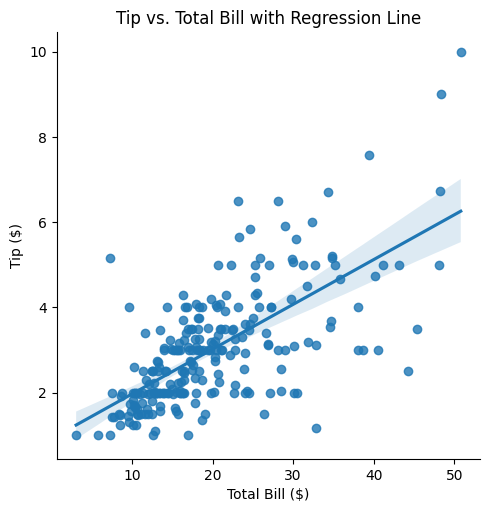

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip"
)

plt.title("Tip vs. Total Bill with Regression Line")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

## Create mosaic plot
The following code creates a mosaic plot to visualize the relationship between the categorical variables gender (sex) 
and time of day (time) in the dataset.

A mosaic plot shows the relative frequencies of combinations of categorical values using rectangles whose areas are 
proportional to the number of observations. In this example:

The x-axis is split according to the values of sex (Female / Male),
and each section is further divided based on time (Lunch / Dinner).
This allows you to easily see whether, for example, a higher proportion of men or women visited the restaurant at a 
particular time of day.

The plot is created using the *mosaic()* function from the statsmodels library, which is specifically designed for this 
type of categorical visualization.

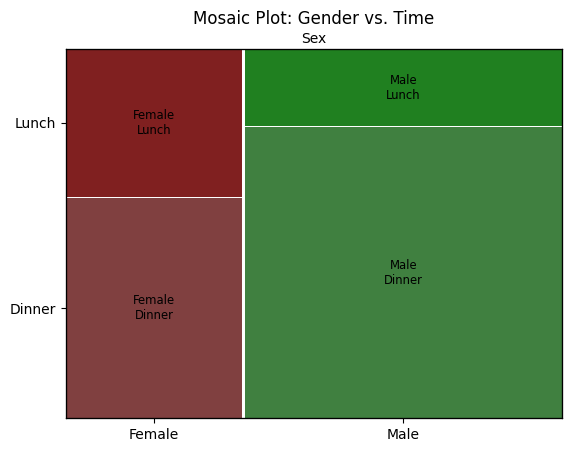

In [8]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

mosaic(tips, ['sex', 'time'])

plt.title("Mosaic Plot: Gender vs. Time")
plt.xlabel("Sex")
plt.ylabel("Proportion")
plt.show()

## Create Boxplot
The following code creates a boxplot that compares the distribution of total bill amounts for the two time categories: 
Lunch and Dinner.

Each box represents the spread of the data for one group and includes:
- the median (horizontal line inside the box),
- the interquartile range (the box itself),
- and potential outliers (individual dots).

The x-axis shows the two time categories (time), while the y-axis displays the corresponding invoice 
amounts (total_bill).
This visualization makes it easy to compare whether bills are generally higher at dinner than at lunch.

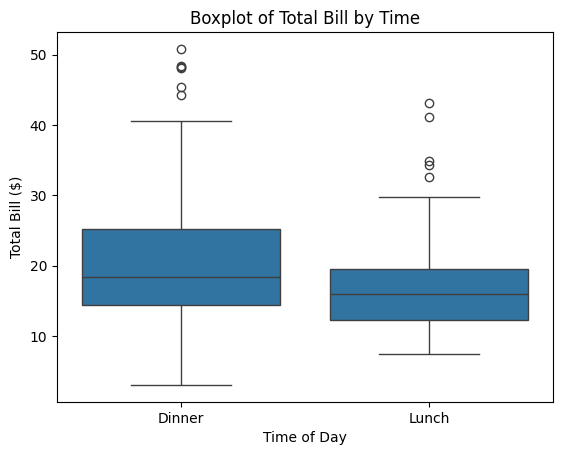

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

sns.boxplot(
    data=tips,
    x="time",
    y="total_bill",
)

plt.title("Boxplot of Total Bill by Time")
plt.xlabel("Time of Day")
plt.ylabel("Total Bill ($)")
plt.show()

## Determine distribution function
The following code computes and visualizes the empirical cumulative distribution function (ECDF) for the 
variable total_bill.

An ECDF shows, for each value on the x-axis, the proportion of observations that are less than or equal to that value. 
The result is a step-shaped curve that increases from 0 to 1. This type of plot is useful to understand how values are 
distributed across the dataset — for example, to estimate what share of bills are below a certain amount.

The function *plt.step()* is used to draw the ECDF as a step function, and grid lines are added to improve readability.

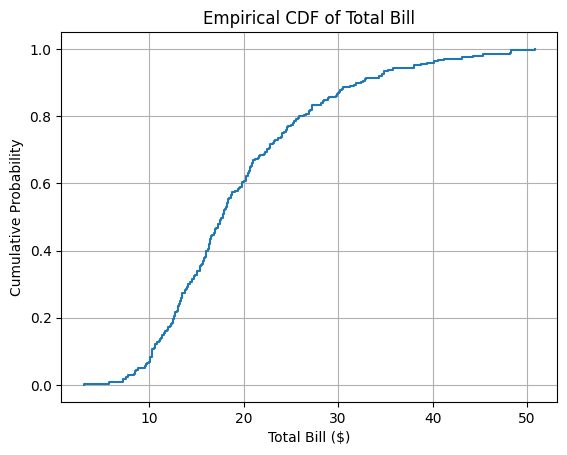

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
tips = pd.read_csv("tips.csv")

ecdf = ECDF(tips["total_bill"])

plt.step(ecdf.x, ecdf.y, where="post")
plt.title("Empirical CDF of Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()